In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

In [2]:
fedavg = json.load(open("./records/fedavg/global_cfmtx_record.json", "r"))
fedavgv2 = json.load(open("./records/fedavgv2/global_cfmtx_record.json", "r"))
fedprox = json.load(open("./records/fedprox/global_cfmtx_record.json", "r"))
feddyn = json.load(open("./records/feddyn/global_cfmtx_record.json", "r"))
scaffold = json.load(open("./records/scaffold/global_cfmtx_record.json", "r"))
proposal4 = json.load(open("./records/proposal4/global_cfmtx_record.json", "r"))
# pFedMe = json.load(open("../pFedMe/results/pFedMe/global_cfmtx_record.json", "r"))
# PerAvg = json.load(open("../pFedMe/results/PerAvg/global_cfmtx_record.json", "r"))

In [4]:
plot_data = {"fedavg" : [], "fedavgv2" : [], "fedprox": [], "feddyn": [], "scaffold": [], "proposal4": []}
for r in range(100):
    # plot_data['fedavg'].append(np.mean(np.diag(fedavg[r])))
    plot_data['fedavgv2'].append(np.mean(np.diag(fedavgv2[r])))
    plot_data['fedprox'].append(np.mean(np.diag(fedprox[r])))
    plot_data['feddyn'].append(np.mean(np.diag(feddyn[r])))
    plot_data['scaffold'].append(np.mean(np.diag(scaffold[r])))
    plot_data['proposal4'].append(np.mean(np.diag(proposal4[r])))

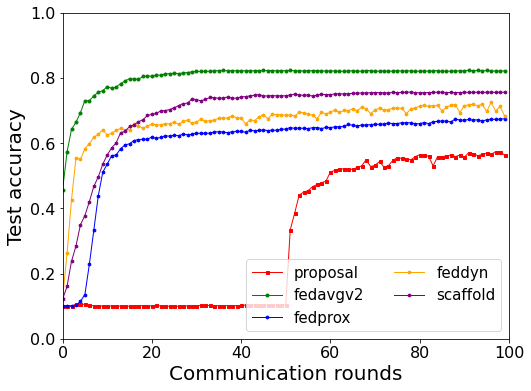

In [5]:
plt.figure(figsize=(8,6))
plt.xlabel("Communication rounds", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

plt.plot(plot_data['proposal4'], label="proposal",
         color='red', linestyle='solid', marker='s',
         linewidth=1, markersize=3)
plt.plot(plot_data['fedavgv2'], label="fedavgv2",
         color='green', linestyle='solid', marker='o',
         linewidth=1, markersize=3)
plt.plot(plot_data['fedprox'], label="fedprox",
         color='blue', linestyle='solid', marker='h',
         linewidth=1, markersize=3)
plt.plot(plot_data['feddyn'], label="feddyn",
         color='orange', linestyle='solid', marker='h',
         linewidth=1, markersize=3)
plt.plot(plot_data['scaffold'], label="scaffold",
         color='purple', linestyle='solid', marker='h',
         linewidth=1, markersize=3)

plt.ylim(0,1)
plt.xlim(0,100)
plt.legend(loc="lower right", fontsize=15, ncol=2)
plt.show()

## Investigate one scenario

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
local_mask_loss_record = json.load(open("./records/proposal4/local_mask_loss_record.json", "r"))
global_masking_loss = json.load(open("./records/proposal4/global_masking_loss.json", "r"))
local_classification_loss_record = json.load(open("./records/proposal4/local_classification_loss_record.json", "r"))

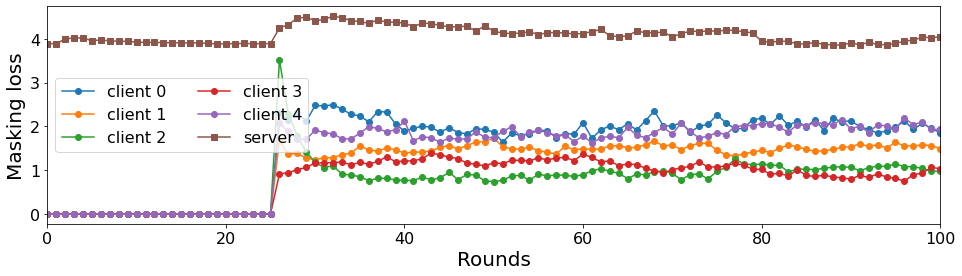

In [5]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(16,4))
for client_id in local_mask_loss_record.keys():
    plt.plot(26* [0] + local_mask_loss_record[client_id], marker='o', linestyle='solid', label=f'client {client_id}')

plt.plot(global_masking_loss, marker='s', linestyle='solid', label=f'server')
plt.legend(loc='best', fontsize=16, ncol=2)
plt.xlabel("Rounds", fontsize=20)
plt.ylabel("Masking loss", fontsize=20)
# plt.ylim(0, 2)
plt.xlim(0, 100)
plt.show()

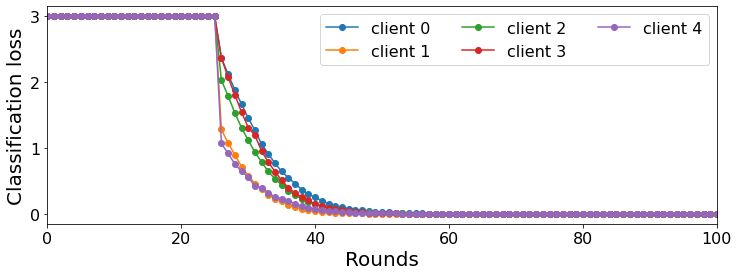

In [9]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(12,4))
for client_id in local_classification_loss_record.keys():
    plt.plot(26 * [3] + local_classification_loss_record[client_id], marker='o', linestyle='solid', label=f'client {client_id}')

plt.legend(loc='best', fontsize=16, ncol=3)
plt.xlabel("Rounds", fontsize=20)
plt.ylabel("Classification loss", fontsize=20)
# plt.ylim(1, 2)
plt.xlim(0, 100)
plt.show()